In [88]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code')
from read_files import *
from stats import *
from plots import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [65]:
cyto_score = get_cyto_score()
cyto_score_pv = get_paried_cyto_score(cyto_score)

report_paths = {x:f"../data/{x}/{x}_report.tsv" for x in ["SRR5088813", "SRR5088814", "SRR5088815", "SRR5088816", "SRR5088817", "SRR5088818", "SRR5088822", "SRR5088823", "SRR5088824", "SRR5088825" ]}

all_bc = run_all_reports_bc(report_paths)
normed_all_bc = (all_bc - all_bc.min().min()) / (all_bc.max().max() - all_bc.min().min())

reports_dfs = pd.Series(
    {sample:read_trust_report_file_with_header(path) for sample, path in report_paths.items()})
    
antibody_reads = pd.Series(
    {sample:report['#count'].sum() \
     for sample, report in reports_dfs.items()}).to_frame('count_antibodies_reads')

cyto_reads_df = antibody_reads.join(cyto_score.reset_index(level=1))

In [ ]:
qc_stats = get_file_stats_from_list(report_paths, antibody_reads).astype(int)

# Stats

In [ ]:
cyto_score_pv

status,Pre,On
pt,,
Pt1,48.985749,13.230992
Pt2,40.385277,44.807463
Pt23,41.298974,84.265667
Pt49,62.144659,289.025216
Pt82,12.619302,41.066441
Pt85,0.239346,2.777579
Pt89,6.523172,21.725226


<Axes: xlabel='Sample2', ylabel='Sample1'>

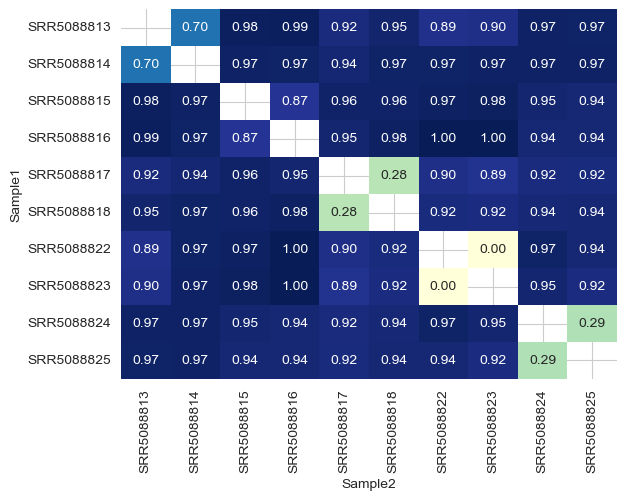

In [53]:
sns.heatmap(normed_all_bc, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)

<string>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


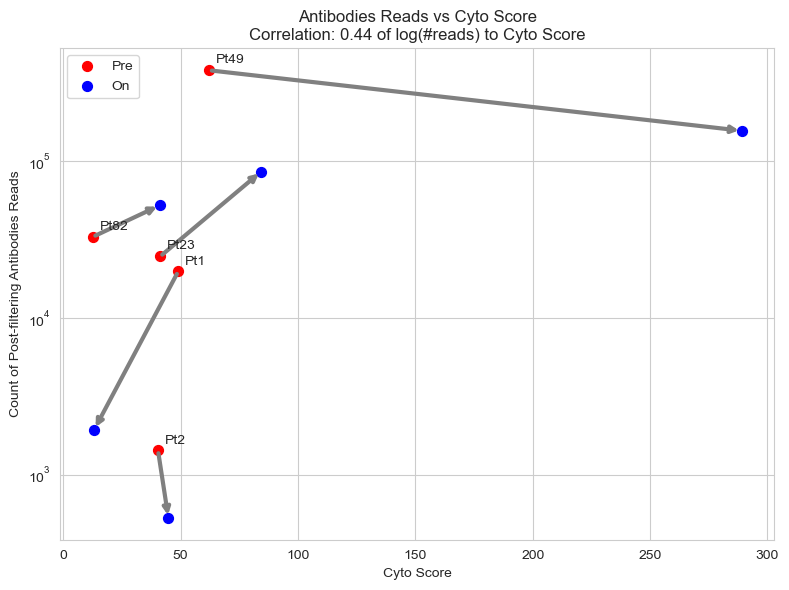

<Figure size 800x600 with 0 Axes>

In [66]:
antibody_cytoscore_plot(cyto_reads_df)

Text(0.5, 1.0, 'Distribution of log(Antibody Reads)')

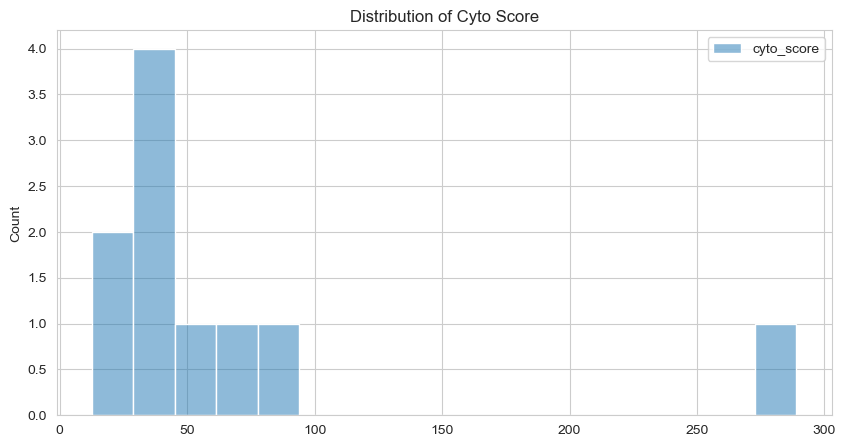

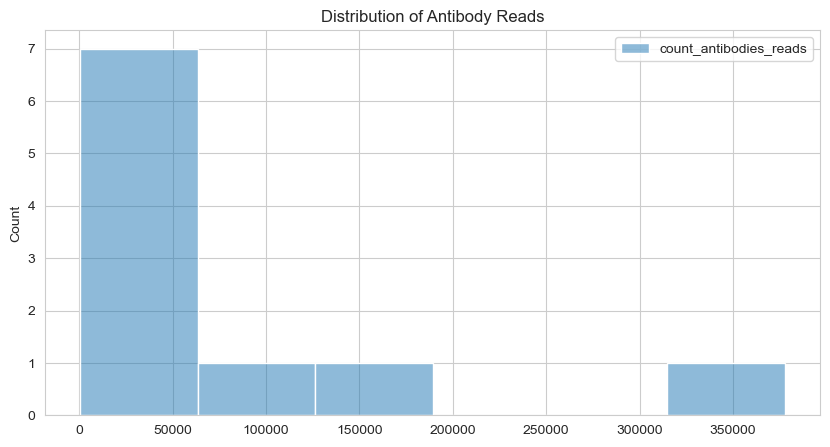

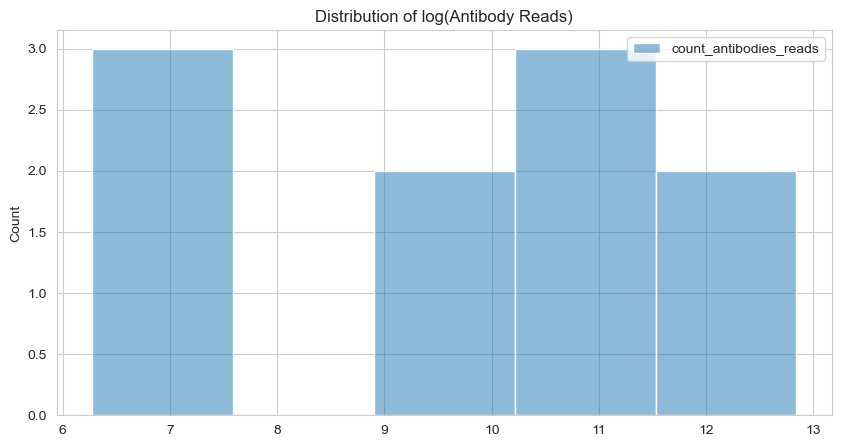

In [72]:
plt.figure(figsize=(10, 5))
sns.histplot(cyto_reads_df[['cyto_score']])
plt.title('Distribution of Cyto Score')

plt.figure(figsize=(10, 5))
sns.histplot(cyto_reads_df[['count_antibodies_reads']])
plt.title('Distribution of Antibody Reads')

plt.figure(figsize=(10, 5))
sns.histplot(np.log(cyto_reads_df[['count_antibodies_reads']]))
plt.title('Distribution of log(Antibody Reads)')

In [96]:
qc_stats

,antibody_raw_count,antibody_final_count,total_read_count,count_antibodies_reads
SRR5088813,5537,4830,51976942,19702
SRR5088814,2564,2170,52641287,1933
SRR5088815,2319,1962,50170621,1424
SRR5088816,1759,1459,50724902,529
SRR5088817,9387,8373,49225898,85206
SRR5088818,4182,3623,50634484,24577
SRR5088822,6336,5468,50772588,32761
SRR5088823,16916,14747,51824899,51940
SRR5088824,22384,20186,53627987,377675
SRR5088825,25086,22761,50586260,155524
